In [28]:
import numpy as np
from sklearn.mixture import GaussianMixture

from sklearn import datasets

import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def make_gmm(n_comps, n_dims):
  section_size = n_dims // n_comps
  means = np.zeros((n_comps, n_dims))
  for i in range(n_comps):
    means[i][i*section_size:(i+1)*section_size] = 1
  data = np.zeros((10000,n_dims))
  for i in range(10000):
    data[i] = means[i%n_comps] + np.random.randn(n_dims)*.3
  gmm = GaussianMixture(n_comps)

  return gmm.fit(data)
gmm = make_gmm(3,3)
print(f'{np.round(gmm.means_,2)}')
print(f'{np.round(gmm.weights_,2)}')
print(f'{np.round(gmm.covariances_,2)}')

In [50]:
data = datasets.load_digits()['data']

gmm = GaussianMixture(10, 'full', max_iter=5000)

gmm = gmm.fit(data)

samples = gmm.sample(10)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass covariance_type=full as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


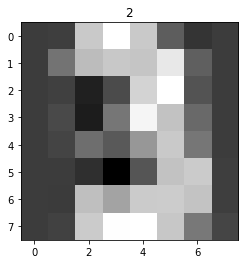

In [46]:
samples[0][0].shape

plt.imshow(samples[0][0].reshape((8,8)), cmap='gray')
plt.title(samples[1][0])
plt.show()


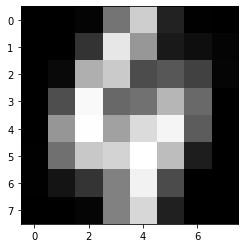

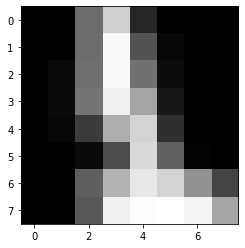

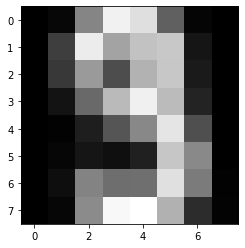

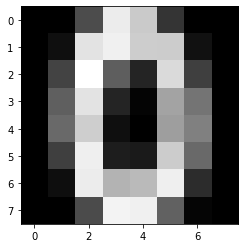

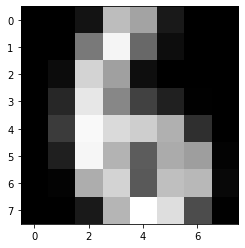

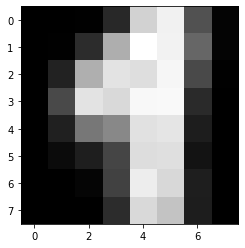

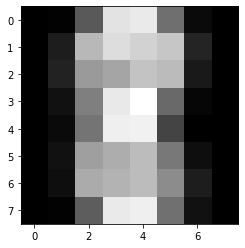

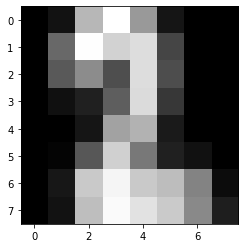

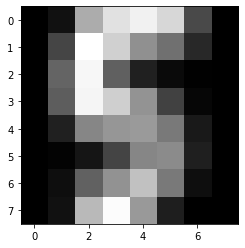

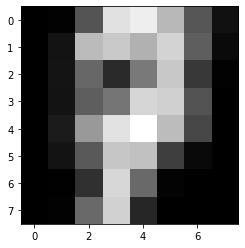

In [49]:
for i in range(10):
  digit = gmm.means_[i]
  plt.imshow(digit.reshape((8,8)), cmap='gray')
  plt.show()

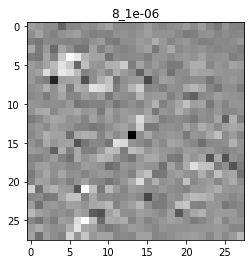

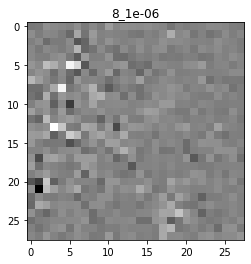

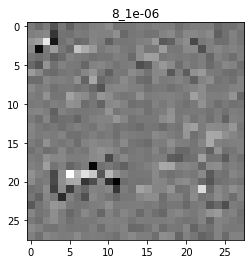

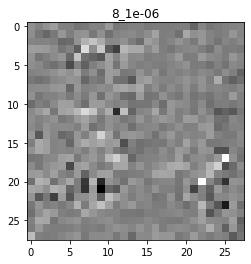

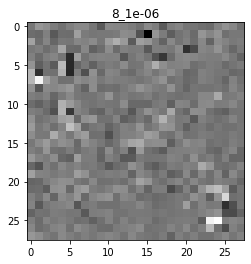

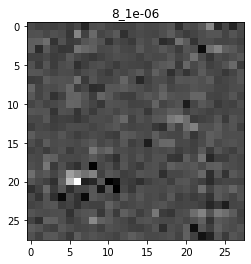

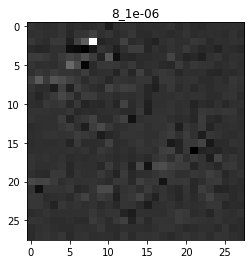

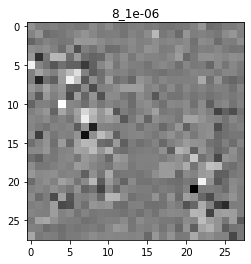

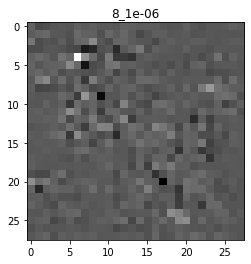

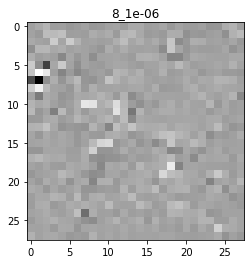

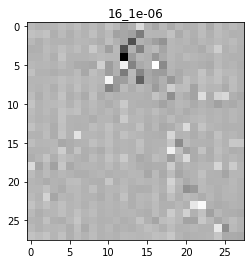

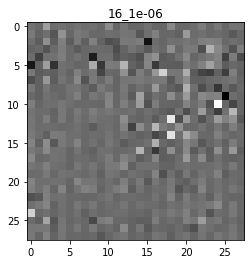

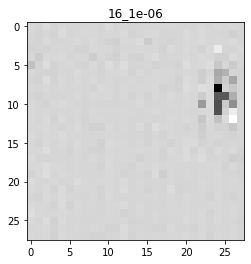

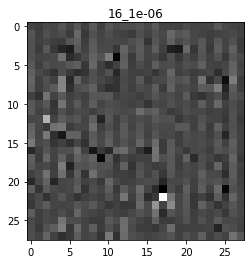

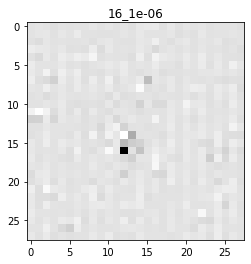

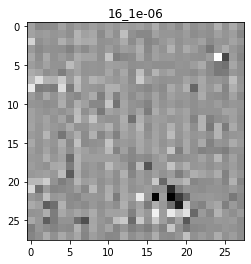

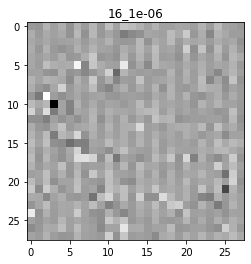

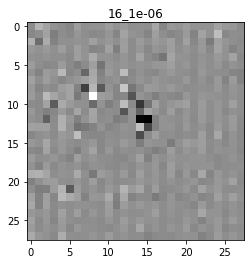

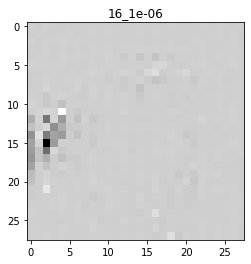

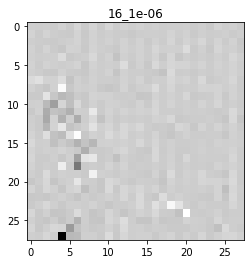

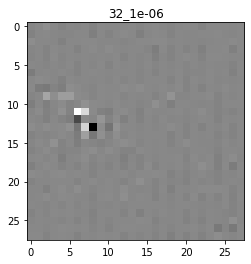

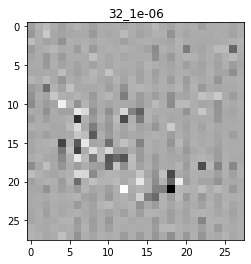

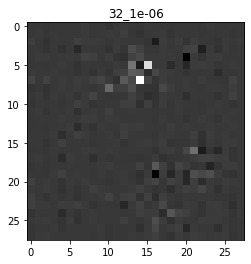

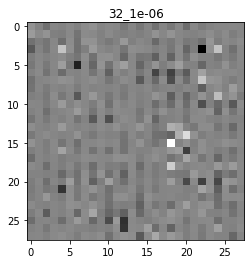

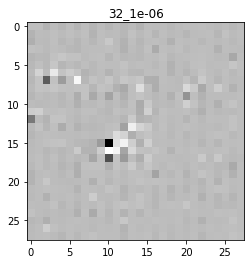

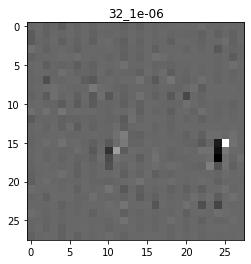

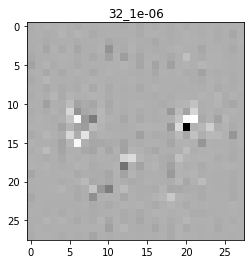

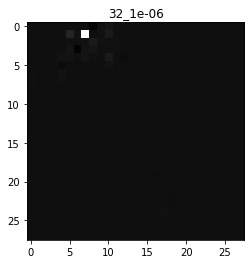

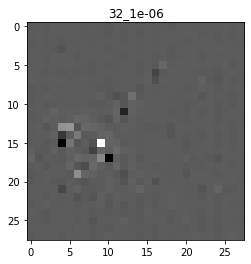

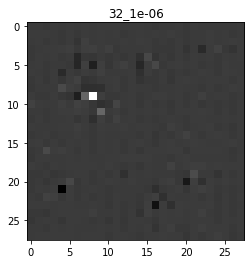

In [23]:
for size in [8,16,32]:
    for lr in ['1e-06']:
        with open(f'chkpt/mnist_gmm_samples_{size}_{lr}.pickle','rb') as in_file:
            samples = pickle.load(in_file)['sample']
        for sample in samples[:10]:
            plt.imshow(sample[0], cmap='gray')
            plt.title(f'{size}_{lr}')
            plt.show()

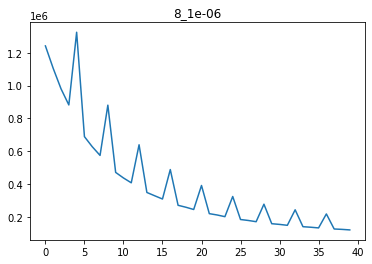

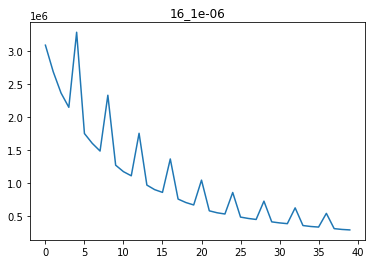

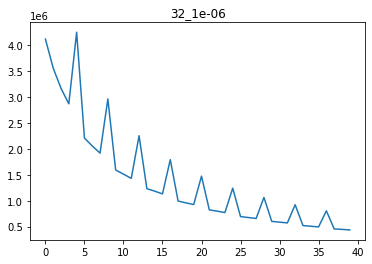

In [22]:
for size in [8,16,32]:
    for lr in ['1e-06']:
        with open(f'chkpt/mnist_gmm_samples_{size}_{lr}.pickle','rb') as in_file:
            losses = np.array(pickle.load(in_file)['losses'])
        plt.plot(losses)
        plt.title(f'{size}_{lr}')
        plt.show()

In [27]:
from acflow import RealNVP

model = RealNVP(
        1, 10, 32,
        None,
        (1,28,28),None
      )
  
model.load_state_dict(torch.load('chkpt/mnist_gmm_32_1e-06.tar')['model_state_dict'])
sum(p.numel() for p in model.parameters())


384192